## Module 4 Final Project Submission

Please fill out:
* Student name: **Chelsea Power**
* Student pace: **part time**
* Scheduled project review date/time: **9/16/19 at 5 pm ET**
* Instructor name: **Brandon Lewis**
* Blog post URL: https://chelseapower.github.io/cleaning_and_crunching_data

In [0]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/nowplayingrs/sentiment_values.csv
/kaggle/input/nowplayingrs/context_content_features.csv
/kaggle/input/nowplayingrs/user_track_hashtag_timestamp.csv


In [0]:
# Set your project id here
PROJECT_ID = 'module4-Project'

from google.cloud import bigquery
client = bigquery.Client(project=PROJECT_ID, location="US")

In [0]:
#import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

## OBTAIN & SCRUB: Prepare the Datasets
* Load 3 datasets: **sentiment_values.csv, user_track_hashtag_timestamp.csv and context_content_features.csv**
* Data type conversions (e.g. numeric data mistakenly encoded as objects)
* Detect and deal with missing values
* Remove unnecessary columns

In [0]:
df = pd.read_csv('../input/nowplayingrs/sentiment_values.csv')

#Look at size of the dataset
df.shape

(5290, 17)

In [0]:
#Look at the columns and initial rows of the dataset
df.head()

,,,,hashtag,vader_min,vader_max,vader_sum,vader_avg,afinn_min,afinn_max,afinn_sum,afinn_avg,ol_min,ol_max,ol_sum,ol_avg,ss_min,ss_max,ss_sum,ss_avg
relaxtime,0.8,0.8,2.4,0.8,NaN,NaN,NaN,NaN,0.7375,0.7375,0.7375,0.7375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
melovechilicheese,0.8,0.8,0.8,0.8,NaN,NaN,NaN,NaN,0.9000,0.9000,0.9000,0.9000,1.0,1.0,1.0,1.0,0.8,0.8,0.8,0.8
greatmusic,0.8,0.8,2.4,0.8,1.0,1.0,1.0,1.0,0.8875,0.8875,0.8875,0.8875,1.0,1.0,1.0,1.0,0.8,0.8,0.8,0.8
rockballad,0.7,0.7,0.7,0.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
amonamarth,0.3,0.3,0.3,0.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [0]:
#Rename hashtag column
df.rename(columns = {'hashtag':'ss_score'}, inplace = True)

#Reset index
df.reset_index(inplace=True)

#Rename columns
df.rename(columns = {'level_0':'hashtag','level_1':'vader_score','level_2':'afinn_score','level_3':'ol_score'}, inplace = True)

#Show dataset to confirm changes
df.head()

,hashtag,vader_score,afinn_score,ol_score,ss_score,vader_min,vader_max,vader_sum,vader_avg,afinn_min,...,afinn_sum,afinn_avg,ol_min,ol_max,ol_sum,ol_avg,ss_min,ss_max,ss_sum,ss_avg
0,relaxtime,0.8,0.8,2.4,0.8,NaN,NaN,NaN,NaN,0.7375,...,0.7375,0.7375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,melovechilicheese,0.8,0.8,0.8,0.8,NaN,NaN,NaN,NaN,0.9000,...,0.9000,0.9000,1.0,1.0,1.0,1.0,0.8,0.8,0.8,0.8
2,greatmusic,0.8,0.8,2.4,0.8,1.0,1.0,1.0,1.0,0.8875,...,0.8875,0.8875,1.0,1.0,1.0,1.0,0.8,0.8,0.8,0.8
3,rockballad,0.7,0.7,0.7,0.7,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,amonamarth,0.3,0.3,0.3,0.3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [0]:
#Set columns
df.columns=['hashtag','vader_score','afinn_score','ol_score','ss_score','vader_min','vader_max','vader_sum','vader_avg','afinn_min',
            'afinn_max','afinn_sum','afinn_avg','ol_min','ol_max','ol_sum','ol_avg','ss_min','ss_max','ss_sum','ss_avg']

The following 12 columns are unecessary and will be removed from the data set:

- **vader_min**: no valuable information, will use vader_score instead
- **vader_max**: no valuable information, will use vader_score instead
- **vader_sum**: no valuable information, will use vader_score instead
- **affin_min**: no valuable information, will use affin_score instead
- **affin_max**: no valuable information, will use affin_score instead
- **affin_sum**: no valuable information, will use affin_score instead
- **ol_min**: no valuable information, will use ol_score instead
- **ol_max**: no valuable information, will use ol_score instead
- **ol_sum**: no valuable information, will use ol_score instead
- **ss_min**: no valuable information, will use ss_score instead
- **ss_max**: no valuable information, will use ss_score instead
- **ss_sum**: no valuable information, will use ss_score instead

In [0]:
df = df.drop(['vader_min','vader_max','vader_sum','afinn_min','afinn_max','afinn_sum','ol_min','ol_max','ol_sum','ss_min','ss_max','ss_sum'], axis=1)
df.head()

,hashtag,vader_score,afinn_score,ol_score,ss_score,vader_avg,afinn_avg,ol_avg,ss_avg
0,relaxtime,0.8,0.8,2.4,0.8,NaN,0.7375,NaN,NaN
1,melovechilicheese,0.8,0.8,0.8,0.8,NaN,0.9000,1.0,0.8
2,greatmusic,0.8,0.8,2.4,0.8,1.0,0.8875,1.0,0.8
3,rockballad,0.7,0.7,0.7,0.7,NaN,NaN,NaN,NaN
4,amonamarth,0.3,0.3,0.3,0.3,NaN,NaN,0.0,NaN


In [0]:
#Show how many (sum) unique values are in the hashtag column
len(df['hashtag'].unique().tolist())

5290

In [0]:
df.info()
#There all score columns are missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 9 columns):
hashtag        5290 non-null object
vader_score    3867 non-null float64
afinn_score    3867 non-null float64
ol_score       3867 non-null float64
ss_score       3867 non-null float64
vader_avg      255 non-null float64
afinn_avg      2635 non-null float64
ol_avg         2823 non-null float64
ss_avg         2160 non-null float64
dtypes: float64(8), object(1)
memory usage: 372.1+ KB


In [0]:
#Fill in missing vader_score with vader_avg score, if available
df['vader_score'] = df.apply(
    lambda row: row['vader_avg'] if np.isnan(row['vader_score']) else row['vader_score'],
    axis=1
)

In [0]:
df.info()
#vader_score didn't change

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 9 columns):
hashtag        5290 non-null object
vader_score    3871 non-null float64
afinn_score    3867 non-null float64
ol_score       3867 non-null float64
ss_score       3867 non-null float64
vader_avg      255 non-null float64
afinn_avg      2635 non-null float64
ol_avg         2823 non-null float64
ss_avg         2160 non-null float64
dtypes: float64(8), object(1)
memory usage: 372.1+ KB


In [0]:
#Fill in missing afinn_score with afinn_avg score, if available
df['afinn_score'] = df.apply(
    lambda row: row['afinn_avg'] if np.isnan(row['afinn_score']) else row['afinn_score'],
    axis=1
)

In [0]:
df.info()
#afinn_score increased from 3867 to 4532

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 9 columns):
hashtag        5290 non-null object
vader_score    3871 non-null float64
afinn_score    4532 non-null float64
ol_score       3867 non-null float64
ss_score       3867 non-null float64
vader_avg      255 non-null float64
afinn_avg      2635 non-null float64
ol_avg         2823 non-null float64
ss_avg         2160 non-null float64
dtypes: float64(8), object(1)
memory usage: 372.1+ KB


In [0]:
#Fill in missing ol_score with ol_avg score, if available
df['ol_score'] = df.apply(
    lambda row: row['ol_avg'] if np.isnan(row['ol_score']) else row['ol_score'],
    axis=1
)

In [0]:
df.info()
#ol_score increased from 3867 to 4831

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 9 columns):
hashtag        5290 non-null object
vader_score    3871 non-null float64
afinn_score    4532 non-null float64
ol_score       4831 non-null float64
ss_score       3867 non-null float64
vader_avg      255 non-null float64
afinn_avg      2635 non-null float64
ol_avg         2823 non-null float64
ss_avg         2160 non-null float64
dtypes: float64(8), object(1)
memory usage: 372.1+ KB


In [0]:
#Fill in missing ss_score with ss_avg score, if available
df['ss_score'] = df.apply(
    lambda row: row['ss_avg'] if np.isnan(row['ss_score']) else row['ss_score'],
    axis=1
)

In [0]:
df.info()
#ss_score increased from 3867 to 4471

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 9 columns):
hashtag        5290 non-null object
vader_score    3871 non-null float64
afinn_score    4532 non-null float64
ol_score       4831 non-null float64
ss_score       4471 non-null float64
vader_avg      255 non-null float64
afinn_avg      2635 non-null float64
ol_avg         2823 non-null float64
ss_avg         2160 non-null float64
dtypes: float64(8), object(1)
memory usage: 372.1+ KB


In [0]:
#Remove all of the unnecessary scores - ol_score has the highest amount of ratings per hashtag
df1 = df.drop(['vader_score','afinn_score','ss_score','vader_avg','afinn_avg','ol_avg','ss_avg'], axis=1)
df1.head()

,hashtag,ol_score
0,relaxtime,2.4
1,melovechilicheese,0.8
2,greatmusic,2.4
3,rockballad,0.7
4,amonamarth,0.3


In [0]:
df1 = df1.dropna(axis = 0, how ='any') 
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4831 entries, 0 to 5289
Data columns (total 2 columns):
hashtag     4831 non-null object
ol_score    4831 non-null float64
dtypes: float64(1), object(1)
memory usage: 113.2+ KB


In [0]:
df1.sort_index(by='hashtag', ascending=[False])

,hashtag,ol_score
1118,zerofucks,0.2
556,zappa,0.0
2467,zapetlone,0.3
2565,zapateando,0.0
1963,youwontbemissed,0.3
713,yousomuchrightnow,1.0
3892,youshockme,0.2
4808,yourwelcome,0.7
785,yoursavior,1.0
2136,yourfriendlystation,0.7


In [0]:
#Rename column
df1.rename(columns = {'ol_score':'sentiment_score'}, inplace = True)
df1.head()

,hashtag,sentiment_score
0,relaxtime,2.4
1,melovechilicheese,0.8
2,greatmusic,2.4
3,rockballad,0.7
4,amonamarth,0.3


In [0]:
#Show top 10 hashtags with the largest sentiment_score
x = df1.nlargest(10, 'sentiment_score', keep='all')
x

,hashtag,sentiment_score
4889,thriller,4.8
1287,harmonicalove,4.7
4174,well,3.9
4458,richardmarx,3.6
4924,richmond,3.6
471,loversrock,3.4
630,cozypowell,3.4
4173,impressionnance,3.3
280,preciousgrace,3.2
1514,greatsongforagreatday,3.2


In [0]:
#Look at dataset by sentiment score counts
count = df1.groupby(['sentiment_score']).count() 
print(count)

                 hashtag
sentiment_score         
0.0                  455
0.1                   42
0.2                  197
0.3                  473
0.3                   47
0.4                  191
0.5                   26
0.6                  515
0.6                  106
0.7                  481
0.8                  313
0.9                  287
0.9                   17
0.9                    3
1.0                  522
1.1                   24
1.2                  110
1.2                   24
1.3                   13
1.3                    2
1.4                  268
1.5                   12
1.5                    1
1.6                  251
1.7                    7
1.7                    1
1.8                   48
1.8                   38
1.9                    4
2.0                    4
2.1                  140
2.2                    2
2.4                    5
2.4                    9
2.4                  126
2.6                   16
2.6                    1
2.7                   20


## Load the second dataset
* Remove null values
* Remove tracks that were played less than 50 times
* Merge it with the cleaned df1 dataset

In [0]:
#Load second dataset
df2 = pd.read_csv('../input/nowplayingrs/user_track_hashtag_timestamp.csv')

#Look at size of the dataset
df2.shape

(17560113, 4)

In [0]:
#Look at the columns and initial rows of the dataset
df2.head()

,user_id,track_id,hashtag,created_at
0,81496937,cd52b3e5b51da29e5893dba82a418a4b,nowplaying,2014-01-01 05:54:21
1,81496937,cd52b3e5b51da29e5893dba82a418a4b,goth,2014-01-01 05:54:21
2,81496937,cd52b3e5b51da29e5893dba82a418a4b,deathrock,2014-01-01 05:54:21
3,81496937,cd52b3e5b51da29e5893dba82a418a4b,postpunk,2014-01-01 05:54:21
4,2205686924,da3110a77b724072b08f231c9d6f7534,NowPlaying,2014-01-01 05:54:22


In [0]:
#Check for null values
df2.apply(lambda x: x.isnull().sum())

user_id       0
track_id      0
hashtag       1
created_at    0
dtype: int64

In [0]:
#Drop null rows
df2.dropna(subset=['hashtag'], inplace=True)
df2.apply(lambda x: x.isnull().sum())

user_id       0
track_id      0
hashtag       0
created_at    0
dtype: int64

In [0]:
# Get the count of the track_id
counts = df2['track_id'].value_counts()

# Select the items where the track_id count is less than 50 and remove them
df2 = df2[~df2['track_id'].isin(counts[counts < 50].index)]

# Show info
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14966614 entries, 0 to 17560112
Data columns (total 4 columns):
user_id       int64
track_id      object
hashtag       object
created_at    object
dtypes: int64(1), object(3)
memory usage: 570.9+ MB


In [0]:
df2.user_id.value_counts()

15518784      760846
2293477190    199314
318753478     185412
624797870     141574
1262924646    115376
               ...  
1275784734         1
433927397          1
288950370          1
236088591          1
1409417280         1
Name: user_id, Length: 126887, dtype: int64

In [0]:
df2.track_id.value_counts()

e24deb4963769d25e2c03ad9bf58a028    82551
3d02f9fcad37e6bb227682761039498c    43456
d6b1124fdd64c4b1afa59f967397111d    32735
5758909ef03fc3a2efaa57408ad43f22    32231
acca7456f99b4699871d3fe249e5fe11    32066
                                    ...  
10fe75f468b812cd4e6def082db48d96       50
51cc093925754b04368fc59b64510dd4       50
6bff81def94311cda50f607ea7290e16       50
5ca1da90a3ba35d568f262b98954aa30       50
8b4f24c4d24a7afeeffe1c181c610f9b       50
Name: track_id, Length: 49601, dtype: int64

In [0]:
#Merge CSV files into a single file based on hashtag
df_sentiment = pd.merge(df1, df2, on="hashtag", how='inner')
df_sentiment.head()

,hashtag,sentiment_score,user_id,track_id,created_at
0,relaxtime,2.4,104415394,9175ac1532ee7dbe97602866efabac58,2014-05-20 07:24:40
1,relaxtime,2.4,240771401,c2da30eb3450e8a3e5bfa16e8fa527da,2014-10-12 22:46:57
2,relaxtime,2.4,637256774,dcbb5aff8f96a79be9f59bc0e7b5c38d,2014-11-07 13:01:08
3,greatmusic,2.4,252330820,8f2ac86abb8bd48273c8fc95b632e347,2014-02-13 16:18:51
4,greatmusic,2.4,29235188,45bbd6d7cd65dc77596af8c5c0b89a70,2014-05-15 20:38:46


In [0]:
#Confirm null values in new dataframe
df_sentiment.apply(lambda x: x.isnull().sum())

hashtag            0
sentiment_score    0
user_id            0
track_id           0
created_at         0
dtype: int64

In [0]:
df_sentiment.shape

(5126717, 5)

In [0]:
df_sentiment.hashtag.value_counts().head(10)

nowplaying         4870436
kiss92               56437
postpunk             25299
punk                 24730
deathrock            24699
urbantraxxradio      23867
tophits              22836
craveradio            9735
rock                  9483
stonerrock            4297
Name: hashtag, dtype: int64

Now that the two CSV files are joined (inner join), the new dataframe `df_sentiment` is reduced to **5,126,717** rows (from 17,560,114).

## Load the third dataset
* Remove tracks that were played less than 50 times
* Remove unnecessary columns
* Remove null values
* Reduce the dataset to English only language
* Merge it with the df_sentiment dataset based on `track_id`, `created_at` and `user_id` columns

In [0]:
#Load third dataset and limit it to only load 22 columns
df3 = pd.read_csv('../input/nowplayingrs/context_content_features.csv', usecols=range(0, 22))

#Look at size of the dataset
df3.shape

(11614671, 22)

In [0]:
# Get the count of the track_id
counts = df3['track_id'].value_counts()

# Select the items where the track_id count is less than 50 and remove them
df3 = df3[~df3['track_id'].isin(counts[counts < 50].index)]

# Show info
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9143294 entries, 1 to 11614670
Data columns (total 22 columns):
coordinates         object
instrumentalness    float64
liveness            float64
speechiness         float64
danceability        float64
valence             float64
loudness            float64
tempo               float64
acousticness        float64
energy              float64
mode                float64
key                 float64
artist_id           object
place               object
geo                 object
tweet_lang          object
track_id            object
created_at          object
lang                object
time_zone           object
user_id             float64
id                  int64
dtypes: float64(12), int64(1), object(9)
memory usage: 1.6+ GB


By removing tracks that were played less than 50 times, the dataset is reduced from 11,614,671 to **9,143,294** rows. The following unnecessary columns will be droped:

- **coordinates**: no valuable information, will use `time_zone` instead
- **id**: no valuable information, will use `user_id instead
- **place**: no valuable information, will use `time_zone` instead
- **geo**: no valuable information, will use `time_zone` instead

In [0]:
#Drop unnecessary columns before merging with df_sentiment dataframe
df3 = df3.drop(['coordinates','id','place','geo'], axis=1)
df3.head()

,instrumentalness,liveness,speechiness,danceability,valence,loudness,tempo,acousticness,energy,mode,key,artist_id,tweet_lang,track_id,created_at,lang,time_zone,user_id
1,0.017700,0.0638,0.0624,0.769,0.752,-8.252,95.862,0.2670,0.826,1.0,7.0,5cddcd0e314e2f2223ab21937d2c8778,en,da3110a77b724072b08f231c9d6f7534,2014-01-01 05:54:22,en,NaN,2.205687e+09
2,0.000000,0.0860,0.0436,0.675,0.775,-4.432,97.030,0.2170,0.885,0.0,1.0,e41273f43af504714d85465294f1f369,en,ba84d88c10fb0e42d4754a27ead10546,2014-01-01 05:54:22,es,Mountain Time (US & Canada),1.325884e+08
3,0.000000,0.1430,0.0292,0.324,0.333,-5.647,74.101,0.2390,0.574,1.0,7.0,557ce373bd29743eb00a3723ab19ebe8,en,33f95122281f76e7134f9cbea3be980f,2014-01-01 05:54:24,en,Eastern Time (US & Canada),9.767522e+07
5,0.000000,0.1100,0.0375,0.641,0.912,-4.271,93.010,0.0268,0.787,1.0,0.0,f965ec352eb8c0efc0af46244754942f,en,8bd5206b84c968eda0af8bc86d6ab1d1,2014-01-01 05:54:25,en,Central Time (US & Canada),4.522857e+08
6,0.000006,0.3620,0.1340,0.554,0.677,-4.271,126.045,0.0216,0.878,1.0,3.0,a3abd1e016fdba82a91379b7e2b9ab69,en,23ced06ca57d37fa749b1595bc7ed1a4,2014-01-01 05:54:28,en,Quito,6.508628e+07


In [0]:
#Drop all null value rows
df3 = df3.dropna()

#Convert mode to Int64
df3['mode'] = df3['mode'].astype('Int64')

df3.shape

(6413576, 18)

Reduced the dataset from 10,887,911 to **6,413,576** by dropping all null value rows.

In [0]:
#Limit dataset to only en (English) language
df3 = df3.loc[~((df3['lang'] != 'en')),:]
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4916702 entries, 3 to 11614670
Data columns (total 18 columns):
instrumentalness    float64
liveness            float64
speechiness         float64
danceability        float64
valence             float64
loudness            float64
tempo               float64
acousticness        float64
energy              float64
mode                Int64
key                 float64
artist_id           object
tweet_lang          object
track_id            object
created_at          object
lang                object
time_zone           object
user_id             float64
dtypes: Int64(1), float64(11), object(6)
memory usage: 717.4+ MB


In [0]:
#Confirm change by looking at the unique values in the lang column
df3.lang.unique()

array(['en'], dtype=object)

Reduced the dataset from 7,740,906 to **4,916,702** by limiting it to English only (lang = en).

In [0]:
#Merge df_sentiment and df3 CSV files into new CSV file based on track_id, created_at and user_id
df4 = df_sentiment.merge(df3, on=['track_id','created_at','user_id'], how='inner')
df4.head()

,hashtag,sentiment_score,user_id,track_id,created_at,instrumentalness,liveness,speechiness,danceability,valence,loudness,tempo,acousticness,energy,mode,key,artist_id,tweet_lang,lang,time_zone
0,greatmusic,2.4,252330820,8f2ac86abb8bd48273c8fc95b632e347,2014-02-13 16:18:51,0.00000,0.1980,0.1690,0.461,0.502,-9.046,143.055,0.1000,0.628,0,4.0,1a17d5f8af99355edd8a92679a02cb0d,en,en,Eastern Time (US & Canada)
1,greatmusic,2.4,29235188,45bbd6d7cd65dc77596af8c5c0b89a70,2014-05-15 20:38:46,0.00001,0.0454,0.0451,0.677,0.886,-13.237,77.837,0.0313,0.544,0,11.0,4a4e2ab094a4521b06252e9fdaf1fd0a,en,en,Eastern Time (US & Canada)
2,nowplaying,0.6,29235188,45bbd6d7cd65dc77596af8c5c0b89a70,2014-05-15 20:38:46,0.00001,0.0454,0.0451,0.677,0.886,-13.237,77.837,0.0313,0.544,0,11.0,4a4e2ab094a4521b06252e9fdaf1fd0a,en,en,Eastern Time (US & Canada)
3,classic,1.0,29235188,45bbd6d7cd65dc77596af8c5c0b89a70,2014-05-15 20:38:46,0.00001,0.0454,0.0451,0.677,0.886,-13.237,77.837,0.0313,0.544,0,11.0,4a4e2ab094a4521b06252e9fdaf1fd0a,en,en,Eastern Time (US & Canada)
4,greatmusic,2.4,195485165,6d45097acaaf6ed5ee55041f53249fa0,2014-10-22 18:36:54,0.00000,0.0769,0.0427,0.591,0.422,-6.315,100.063,0.0171,0.746,1,11.0,f78fb5a7ddce990521f685522f3f8fce,en,en,London


In [0]:
#Convert hashtag info string
df4['hashtag'] = df4['hashtag'].astype(str)

#Convert user_id info string
df4['user_id'] = df4['user_id'].astype(str)

#Show changes
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3094592 entries, 0 to 3094591
Data columns (total 20 columns):
hashtag             object
sentiment_score     float64
user_id             object
track_id            object
created_at          object
instrumentalness    float64
liveness            float64
speechiness         float64
danceability        float64
valence             float64
loudness            float64
tempo               float64
acousticness        float64
energy              float64
mode                Int64
key                 float64
artist_id           object
tweet_lang          object
lang                object
time_zone           object
dtypes: Int64(1), float64(11), object(8)
memory usage: 498.8+ MB


In [0]:
#Create new column sentiment that will be the predictor based on the sentiment_score values
df4['sentiment'] = np.where(df4['sentiment_score']>= 0.01, 1, 0)
df4.head()

,hashtag,sentiment_score,user_id,track_id,created_at,instrumentalness,liveness,speechiness,danceability,valence,...,tempo,acousticness,energy,mode,key,artist_id,tweet_lang,lang,time_zone,sentiment
0,greatmusic,2.4,252330820,8f2ac86abb8bd48273c8fc95b632e347,2014-02-13 16:18:51,0.00000,0.1980,0.1690,0.461,0.502,...,143.055,0.1000,0.628,0,4.0,1a17d5f8af99355edd8a92679a02cb0d,en,en,Eastern Time (US & Canada),1
1,greatmusic,2.4,29235188,45bbd6d7cd65dc77596af8c5c0b89a70,2014-05-15 20:38:46,0.00001,0.0454,0.0451,0.677,0.886,...,77.837,0.0313,0.544,0,11.0,4a4e2ab094a4521b06252e9fdaf1fd0a,en,en,Eastern Time (US & Canada),1
2,nowplaying,0.6,29235188,45bbd6d7cd65dc77596af8c5c0b89a70,2014-05-15 20:38:46,0.00001,0.0454,0.0451,0.677,0.886,...,77.837,0.0313,0.544,0,11.0,4a4e2ab094a4521b06252e9fdaf1fd0a,en,en,Eastern Time (US & Canada),1
3,classic,1.0,29235188,45bbd6d7cd65dc77596af8c5c0b89a70,2014-05-15 20:38:46,0.00001,0.0454,0.0451,0.677,0.886,...,77.837,0.0313,0.544,0,11.0,4a4e2ab094a4521b06252e9fdaf1fd0a,en,en,Eastern Time (US & Canada),1
4,greatmusic,2.4,195485165,6d45097acaaf6ed5ee55041f53249fa0,2014-10-22 18:36:54,0.00000,0.0769,0.0427,0.591,0.422,...,100.063,0.0171,0.746,1,11.0,f78fb5a7ddce990521f685522f3f8fce,en,en,London,1


The following unnecessary columns will be droped:

- **hashtag**: no valuable information, will use `sentiment_score` instead
- **created_at**: no valuable information
- **artist_id**: no valuable information
- **tweet_lang**: no valuable information
- **lang**: no valuable information since this dataset has been reduced to English only

In [0]:
#Drop all null value rows
df4 = df4.dropna()

#Drop unnecessary columns lang and created_at
df4 = df4.drop(['hashtag','created_at','artist_id','tweet_lang','lang'], axis=1)

df4.head()

,sentiment_score,user_id,track_id,instrumentalness,liveness,speechiness,danceability,valence,loudness,tempo,acousticness,energy,mode,key,time_zone,sentiment
0,2.4,252330820,8f2ac86abb8bd48273c8fc95b632e347,0.00000,0.1980,0.1690,0.461,0.502,-9.046,143.055,0.1000,0.628,0,4.0,Eastern Time (US & Canada),1
1,2.4,29235188,45bbd6d7cd65dc77596af8c5c0b89a70,0.00001,0.0454,0.0451,0.677,0.886,-13.237,77.837,0.0313,0.544,0,11.0,Eastern Time (US & Canada),1
2,0.6,29235188,45bbd6d7cd65dc77596af8c5c0b89a70,0.00001,0.0454,0.0451,0.677,0.886,-13.237,77.837,0.0313,0.544,0,11.0,Eastern Time (US & Canada),1
3,1.0,29235188,45bbd6d7cd65dc77596af8c5c0b89a70,0.00001,0.0454,0.0451,0.677,0.886,-13.237,77.837,0.0313,0.544,0,11.0,Eastern Time (US & Canada),1
4,2.4,195485165,6d45097acaaf6ed5ee55041f53249fa0,0.00000,0.0769,0.0427,0.591,0.422,-6.315,100.063,0.0171,0.746,1,11.0,London,1


In [0]:
#Look at unique values for time_zone column
df4.time_zone.unique()

array(['Eastern Time (US & Canada)', 'London', 'Monterrey', 'Alaska',
       'Amsterdam', 'Dublin', 'Central Time (US & Canada)',
       'Pacific Time (US & Canada)', 'Quito', 'Central America',
       'Buenos Aires', 'Mountain Time (US & Canada)', 'Jakarta',
       'Casablanca', 'Mexico City', 'Bangkok', 'Atlantic Time (Canada)',
       'Hawaii', 'Kuala Lumpur', 'Greenland', 'Santiago', 'Madrid',
       'Stockholm', 'Arizona', 'Saskatchewan', 'Beijing', 'Warsaw',
       'Lima', 'Edinburgh', 'Perth', 'Istanbul', 'Lisbon', 'Abu Dhabi',
       'La Paz', 'West Central Africa', 'Athens', 'America/Chicago',
       'Baghdad', 'Singapore', 'Budapest', 'Paris', 'Bern', 'Pretoria',
       'Brisbane', 'Brasilia', 'Moscow', 'Berlin', 'Kyiv', 'Hong Kong',
       'Helsinki', 'New Delhi', 'Sydney', 'Melbourne', 'Harare',
       'Yerevan', 'New Caledonia', 'Adelaide', 'Wellington', 'Copenhagen',
       'Yakutsk', 'Canberra', 'Rome', 'Tokyo', 'Chennai', 'Kathmandu',
       'Seoul', 'Auckland', 'St. Pe

In [0]:
#Make all USA Timezone values consistent
df4['time_zone'].replace('Eastern Time (US & Canada)', 'Eastern Time',inplace=True)
df4['time_zone'].replace('Central Time (US & Canada)', 'Central Time',inplace=True)
df4['time_zone'].replace('Pacific Time (US & Canada)', 'Pacific Time',inplace=True)
df4['time_zone'].replace('Mountain Time (US & Canada)', 'Mountain Time',inplace=True)
df4['time_zone'].replace('Alaska', 'Alaska Time',inplace=True)
df4['time_zone'].replace('Hawaii', 'Hawaii Time',inplace=True)
df4['time_zone'].replace('Arizona', 'Mountain Time',inplace=True)
df4['time_zone'].replace('America/Chicago', 'Central Time',inplace=True)
df4['time_zone'].replace('America/New_York', 'Eastern Time',inplace=True)
df4['time_zone'].replace('America/Los_Angeles', 'Pacific Time',inplace=True)
df4['time_zone'].replace('America/Denver', 'Mountain Time',inplace=True)
df4['time_zone'].replace('America/Detroit', 'Eastern Time',inplace=True)

In [0]:
#Limit dataset to only USA time zones
df4 = df4.loc[~((df4['time_zone'] != 'Eastern Time') & (df4['time_zone'] != 'Central Time') & (df4['time_zone'] != 'Pacific Time') & 
               (df4['time_zone'] != 'Mountain Time') & (df4['time_zone'] != 'Alaska Time') & (df4['time_zone'] != 'Hawaii Time')),:]
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2267492 entries, 0 to 3094591
Data columns (total 16 columns):
sentiment_score     float64
user_id             object
track_id            object
instrumentalness    float64
liveness            float64
speechiness         float64
danceability        float64
valence             float64
loudness            float64
tempo               float64
acousticness        float64
energy              float64
mode                Int64
key                 float64
time_zone           object
sentiment           int64
dtypes: Int64(1), float64(11), int64(1), object(3)
memory usage: 296.3+ MB


Reduced the dataset from 4,916,702 to **2,267,492** by limiting it to USA Timezone data only.

### Create MVP Dataset
- Reduced to U.S.A. only dataset
- **13 feature columns**
    - sentiment_score: Sentiment score from Opinion Lexicon. If no score was provided then a 0 was input.
    - user_id: Unique user ID
    - track_id: Unique track ID
    - sentiment: Sentiment extracted from sentiment score based on range 0-1
    - Instrumentalness: Signifies whether a track contains vocals.
    - Liveness: Presence of an audience in the track recording (range is [0, 1], where 1 indicates high probability of liveness).
    - Speechiness: Presence of spoken words in a track - whether a track contains more music or words (range is [0, 1], where 0 is a track with no speech).
    - Danceability: Suitability of a track for dancing based on a combination of musical elements like tempo, rhythm stability, beat strength, and overall regularity (range is [0, 1], where 1 is a most danceable song).
    - Valence: Musical positiveness conveyed by a track (range is [0, 1], where 1 is a highly positive and cheerful song).
    - Loudness: The overall loudness of a track in decibel (dB).
    - Tempo: The overall estimated tempo of a track in beats per minute (BPM).
    - Acousticness: Probability whether a track is acoustic (range is [0, 1]).
    - Energy: Perceptual measure of intensity and activity (range is [0, 1], where 1 indicates a high-energy track).
    - Mode: Modality (major or minor) of a track, i.e., the type of scale from which its melodic content is derived. Major is 1 and minor is 0.
    - Key: The key that the track is in. Integers map to pitches using standard Pitch Class notation.
    - tz_Alaska_Time: Categorical - One hot encoded from (dropped) timezone column
    - tz_Central_Time: Categorical - One hot encoded from (dropped) timezone column
    - tz_Eastern_Time: Categorical - One hot encoded from (dropped) timezone column
    - tz_Hawaii_Time: Categorical - One hot encoded from (dropped) timezone column
    - tz_Mountain_Time: Categorical - One hot encoded from (dropped) timezone column
    - tz_Pacific_Time: Categorical - One hot encoded from (dropped) timezone column
    - sentiment: Extracted from `sentiment_score` with a range 0-1 and is the **predictor column**

In [0]:
# Reorder columns
df_mvp = df4[['sentiment','sentiment_score','user_id','track_id','time_zone','instrumentalness',
              'liveness','speechiness','danceability','valence','loudness','tempo','acousticness','energy','mode','key']]
df_mvp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2267492 entries, 0 to 3094591
Data columns (total 16 columns):
sentiment           int64
sentiment_score     float64
user_id             object
track_id            object
time_zone           object
instrumentalness    float64
liveness            float64
speechiness         float64
danceability        float64
valence             float64
loudness            float64
tempo               float64
acousticness        float64
energy              float64
mode                Int64
key                 float64
dtypes: Int64(1), float64(11), int64(1), object(3)
memory usage: 296.3+ MB


In [0]:
# Create new dataset with only user_id, track_id and time_zone and the category variables
df_timezone = df_mvp.drop(['user_id','track_id','sentiment','sentiment_score','instrumentalness','liveness','speechiness',
                             'danceability','valence','loudness','tempo','acousticness','energy','mode','key'], axis=1)
df_timezone.head()

,time_zone
0,Eastern Time
1,Eastern Time
2,Eastern Time
3,Eastern Time
7,Alaska Time


In [0]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# One Hot Encode the category data set
one_hot_df = pd.get_dummies(df_timezone)
one_hot_df.head()

,time_zone_Alaska Time,time_zone_Central Time,time_zone_Eastern Time,time_zone_Hawaii Time,time_zone_Mountain Time,time_zone_Pacific Time
0,0,0,1,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,1,0,0,0
7,1,0,0,0,0,0


In [0]:
# Rename the columns
one_hot_df.columns = ['tz_Alaska_Time','tz_Central_Time','tz_Eastern_Time','tz_Hawaii_Time','tz_Mountain_Time','tz_Pacific_Time']
one_hot_df.head()

,tz_Alaska_Time,tz_Central_Time,tz_Eastern_Time,tz_Hawaii_Time,tz_Mountain_Time,tz_Pacific_Time
0,0,0,1,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,1,0,0,0
7,1,0,0,0,0,0


In [0]:
#Drop time_zone from MVP dataset
df_mvp = df_mvp.drop(["time_zone"], axis=1)

In [0]:
#Concatenate one hot encoded dataframe
df_mvp = pd.concat([df_mvp,one_hot_df], axis=1)
df_mvp.head()

,sentiment,sentiment_score,user_id,track_id,instrumentalness,liveness,speechiness,danceability,valence,loudness,...,acousticness,energy,mode,key,tz_Alaska_Time,tz_Central_Time,tz_Eastern_Time,tz_Hawaii_Time,tz_Mountain_Time,tz_Pacific_Time
0,1,2.4,252330820,8f2ac86abb8bd48273c8fc95b632e347,0.000000,0.1980,0.1690,0.461,0.502,-9.046,...,0.100000,0.628,0,4.0,0,0,1,0,0,0
1,1,2.4,29235188,45bbd6d7cd65dc77596af8c5c0b89a70,0.000010,0.0454,0.0451,0.677,0.886,-13.237,...,0.031300,0.544,0,11.0,0,0,1,0,0,0
2,1,0.6,29235188,45bbd6d7cd65dc77596af8c5c0b89a70,0.000010,0.0454,0.0451,0.677,0.886,-13.237,...,0.031300,0.544,0,11.0,0,0,1,0,0,0
3,1,1.0,29235188,45bbd6d7cd65dc77596af8c5c0b89a70,0.000010,0.0454,0.0451,0.677,0.886,-13.237,...,0.031300,0.544,0,11.0,0,0,1,0,0,0
7,1,0.3,124052165,d53b2de022666067050dae8f6645edc2,0.000142,0.1130,0.0709,0.355,0.118,-4.054,...,0.000004,0.980,0,7.0,1,0,0,0,0,0


In [0]:
df_mvp.to_csv('module4_cleaned.csv',index=False)

## Explore the data

* Look at the distribution for the data
* Look for Multicollinearity
* Remove unnecessary features

In [0]:
#Look at value counts of the predictor variable sentiment
df_mvp.sentiment.value_counts()

1    2260390
0       7102
Name: sentiment, dtype: int64

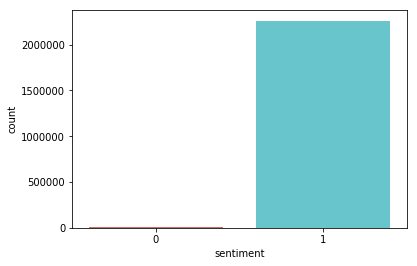

In [0]:
# Visualize the predictor variable
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='sentiment', data=df_mvp, palette='hls')
plt.show()

**Observation**: The data is very imbalanced and will need to be balanced.

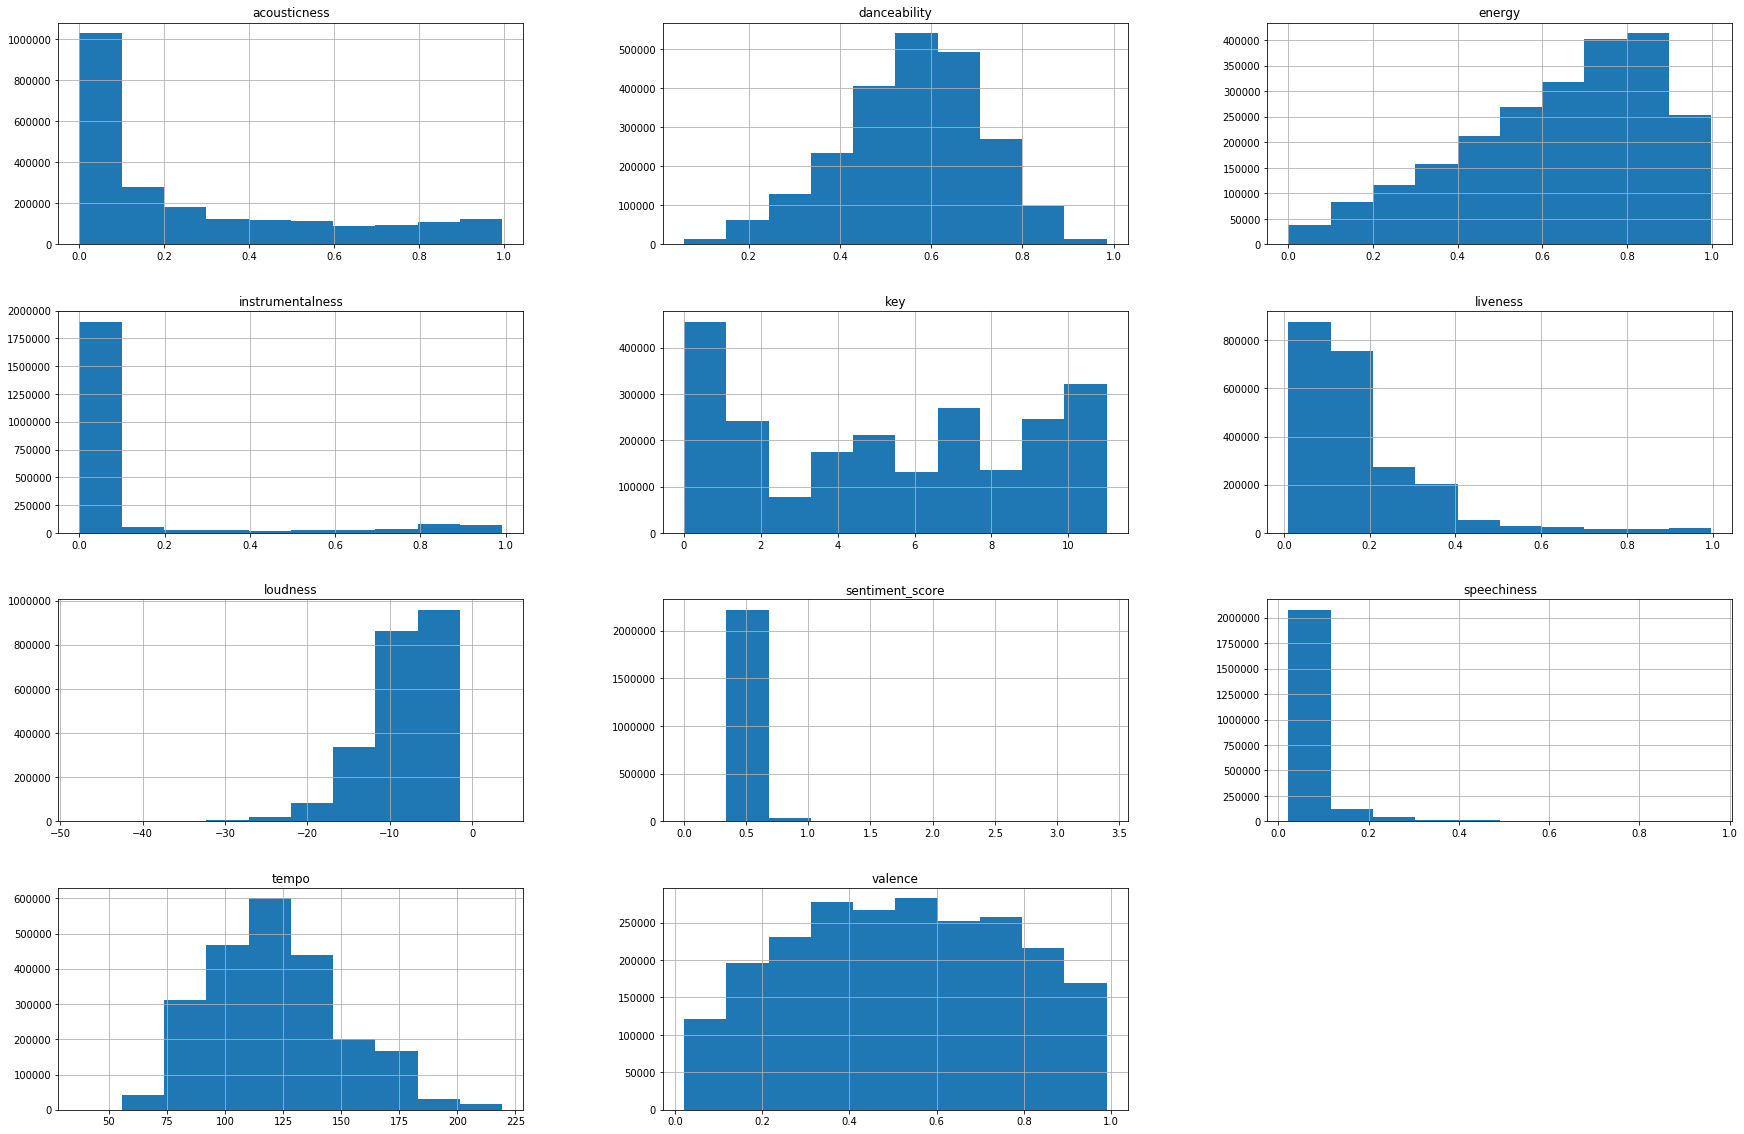

In [0]:
# Create continuous dataset and look at distributions of data
df_mvp_lin = df_mvp.drop(['user_id','track_id','sentiment','mode','tz_Alaska_Time','tz_Central_Time','tz_Eastern_Time',
                          'tz_Hawaii_Time','tz_Mountain_Time','tz_Pacific_Time'], axis=1)
df_mvp_lin.hist(figsize = [30, 20]);

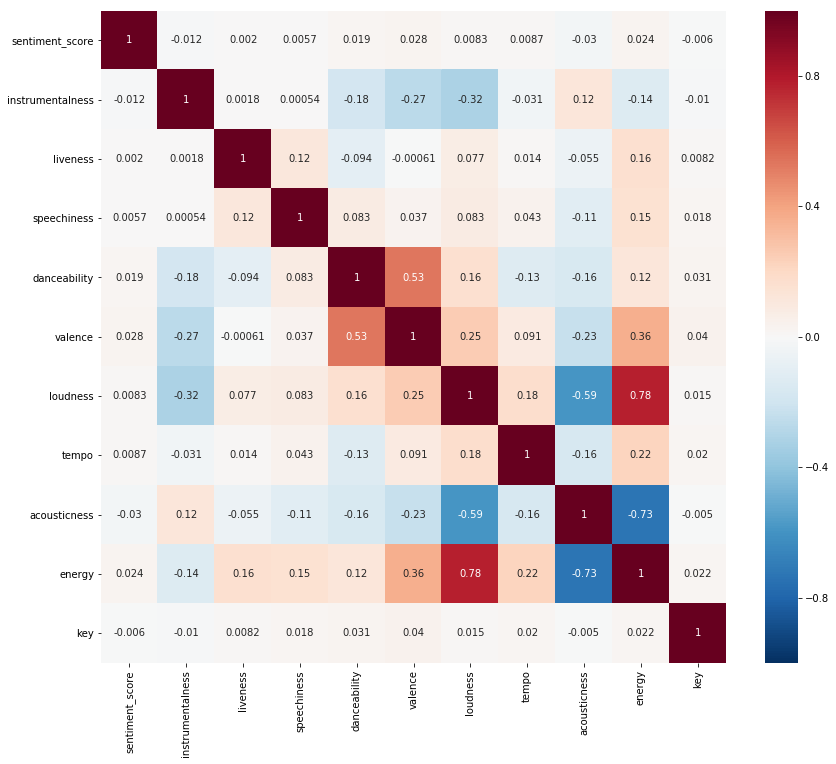

In [0]:
#Create coorelation heatmap and check for multicolinarity
from matplotlib import pyplot as plt
import seaborn as sns

correlation = df_mvp_lin.corr()
plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

**Observation**: Loudness and Energy seem to be highly coorelated.

## Logistic Regression
* Normalize the data prior to fitting the model
* Train-Test Split
* Fit the model
* Predict
* Evaluate

In [0]:
# Define X and y
y = df_mvp['sentiment']
X = df_mvp.drop('sentiment', axis = 1)

In [0]:
# Normalizing the data prior to fitting the model.
x_feats = ['sentiment_score','instrumentalness','liveness','speechiness','danceability',
           'loudness','tempo','acousticness','energy','mode','key','valence','tz_Alaska_Time',
           'tz_Central_Time','tz_Eastern_Time','tz_Hawaii_Time','tz_Mountain_Time','tz_Pacific_Time']

X = pd.get_dummies(df_mvp[x_feats], drop_first=False)
y = df_mvp.sentiment
X.head()

,sentiment_score,instrumentalness,liveness,speechiness,danceability,loudness,tempo,acousticness,energy,mode,key,valence,tz_Alaska_Time,tz_Central_Time,tz_Eastern_Time,tz_Hawaii_Time,tz_Mountain_Time,tz_Pacific_Time
0,2.4,0.000000,0.1980,0.1690,0.461,-9.046,143.055,0.100000,0.628,0,4.0,0.502,0,0,1,0,0,0
1,2.4,0.000010,0.0454,0.0451,0.677,-13.237,77.837,0.031300,0.544,0,11.0,0.886,0,0,1,0,0,0
2,0.6,0.000010,0.0454,0.0451,0.677,-13.237,77.837,0.031300,0.544,0,11.0,0.886,0,0,1,0,0,0
3,1.0,0.000010,0.0454,0.0451,0.677,-13.237,77.837,0.031300,0.544,0,11.0,0.886,0,0,1,0,0,0
7,0.3,0.000142,0.1130,0.0709,0.355,-4.054,130.427,0.000004,0.980,0,7.0,0.118,1,0,0,0,0,0


In [0]:
from sklearn.model_selection import train_test_split

# Splitting the data into train and test sets (automatically uses stratified sampling by labels)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [0]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(fit_intercept = True, C=1e12)
model_log = logreg.fit(X_train, y_train)
model_log

LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
print(y_train.value_counts())
print(y_test.value_counts())

1    1695323
0       5296
Name: sentiment, dtype: int64
1    565067
0      1806
Name: sentiment, dtype: int64


In [0]:
#Predict against test set using Sigmoid function
y_hat_test = logreg.predict(X_test)
y_hat_train = logreg.predict(X_train)

In [0]:
y_hat_test = logreg.predict_proba(X_test)
y_hat_test[0]

array([1.43807059e-06, 9.99998562e-01])

In [0]:
logreg.predict_proba(X_train)

array([[2.06983581e-06, 9.99997930e-01],
       [2.48730535e-06, 9.99997513e-01],
       [4.00485206e-07, 9.99999600e-01],
       ...,
       [7.86858264e-07, 9.99999213e-01],
       [1.11968453e-05, 9.99988803e-01],
       [5.78679746e-06, 9.99994213e-01]])

In [0]:
# How may times was the classifier correct for the training set?
logreg.score(X_train, y_train)

0.9999958838517035

In [0]:
# How may times was the classifier correct for the test set?
logreg.score(X_test, y_test)

0.9999911796822216

### Classification Model Performance
Check the precision, recall, and accuracy

In [0]:
# Function to calculate the precision
def precision(y_hat, y):
    y_y_hat = list(zip(y, y_hat))
    tp = sum([1 for i in y_y_hat if i[0]==1 and i[1]==1])
    fp = sum([1 for i in y_y_hat if i[0]==0 and i[1]==1])
    return tp/float(tp+fp)

In [0]:
# Function to calculate the recall
def recall(y_hat, y):
    y_y_hat = list(zip(y, y_hat))
    tp = sum([1 for i in y_y_hat if i[0]==1 and i[1]==1])
    fn = sum([1 for i in y_y_hat if i[0]==1 and i[1]==0])
    return tp/float(tp+fn)

In [0]:
# Function to calculate the accuracy
def accuracy(y_hat, y):
    y_y_hat = list(zip(y, y_hat))
    tp = sum([1 for i in y_y_hat if i[0]==1 and i[1]==1])
    tn = sum([1 for i in y_y_hat if i[0]==0 and i[1]==0])
    return (tp+tn)/float(len(y_hat))

In [0]:
# Calculate the precision, recall and accuracy of the classifier.
y_hat_test = logreg.predict(X_test)
y_hat_train = logreg.predict(X_train)

print('Training Precision: ', precision(y_hat_train, y_train))
print('Testing Precision: ', precision(y_hat_test, y_test))
print('\n')

print('Training Recall: ', recall(y_hat_train, y_train))
print('Testing Recall: ', recall(y_hat_test, y_test))
print('\n')

print('Training Accuracy: ', accuracy(y_hat_train, y_train))
print('Testing Accuracy: ', accuracy(y_hat_test, y_test))

Training Precision:  1.0
Testing Precision:  1.0


Training Recall:  0.9999958709933151
Testing Recall:  0.99999115149177


Training Accuracy:  0.9999958838517035
Testing Accuracy:  0.9999911796822216


### Resample data since it's imbalanced and all scores are very high.

In [0]:
# concatenate our training data back together
training_data = pd.concat([X_train, y_train], axis=1)

In [0]:
# separate minority and majority classes
not_safe = training_data[training_data.sentiment==0]
safe = training_data[training_data.sentiment==1]

In [0]:
from sklearn.utils import resample
# upsample minority
not_safe_upsampled = resample(not_safe, 
                              replace=True, # sample with replacement
                              n_samples=len(safe), # match number in majority class
                              random_state=42) # reproducible results

In [0]:
# combine majority and upsampled minority
upsampled = pd.concat([safe, not_safe_upsampled])

In [0]:
# check new class counts
print(upsampled.sentiment.value_counts())

1    1695323
0    1695323
Name: sentiment, dtype: int64


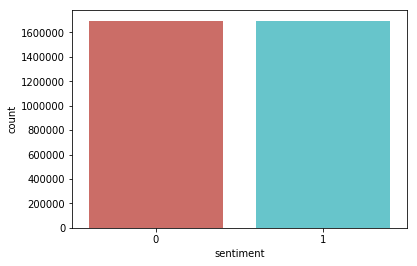

In [0]:
sns.countplot(x='sentiment', data=upsampled, palette='hls')
plt.show()

In [0]:
X_train = upsampled.drop('sentiment', axis=1)
y_train = upsampled.sentiment

In [0]:
# Scaling X using StandardScaler
from sklearn.preprocessing import StandardScaler

# Only fit training data to avoid data leakage
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=list(X.columns))
X_test = pd.DataFrame(scaler.transform(X_test), columns=list(X.columns))
X_train.head()

,sentiment_score,instrumentalness,liveness,speechiness,danceability,loudness,tempo,acousticness,energy,mode,key,valence,tz_Alaska_Time,tz_Central_Time,tz_Eastern_Time,tz_Hawaii_Time,tz_Mountain_Time,tz_Pacific_Time
0,0.962682,-0.606821,-0.483723,-0.388033,0.319854,-2.020783,0.551571,1.774347,-2.310594,0.737493,-0.148884,-0.159136,-0.075431,-0.930547,-0.617547,-0.037875,-0.141775,1.814055
1,0.962682,-0.611195,-0.867771,0.434265,1.100470,1.432856,-0.135328,-0.614252,0.774268,0.737493,-1.523909,0.613208,-0.075431,1.074637,-0.617547,-0.037875,-0.141775,-0.551251
2,0.962682,-0.612022,-0.525926,-0.584066,0.190776,0.883212,-0.834060,-0.360161,0.358383,0.737493,-1.523909,0.343692,-0.075431,-0.930547,1.619310,-0.037875,-0.141775,-0.551251
3,0.962682,-0.452412,-0.691724,-0.511204,0.375174,0.167024,0.706778,-0.523430,-0.030081,0.737493,-1.248904,0.299443,-0.075431,-0.930547,1.619310,-0.037875,-0.141775,-0.551251
4,0.962682,-0.612013,-0.610332,0.127204,0.995978,-1.323499,-1.032017,2.403391,-2.342585,-1.355945,1.226141,-0.275792,-0.075431,-0.930547,1.619310,-0.037875,-0.141775,-0.551251


### Run another Logistic Regression Model with resampled data

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

logreg2 = LogisticRegression(fit_intercept = True, C=1e12)
model_log = logreg2.fit(X_train, y_train)
model_log

LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
print(y_train.value_counts())
print(y_test.value_counts())

1    1695323
0    1695323
Name: sentiment, dtype: int64
1    565067
0      1806
Name: sentiment, dtype: int64


In [0]:
# Predict against test set using Sigmoid function
y_hat_test = logreg2.predict(X_test)
y_hat_train = logreg2.predict(X_train)

In [0]:
y_hat_test = logreg2.predict_proba(X_test)
y_hat_test[0]

array([9.47160256e-07, 9.99999053e-01])

In [0]:
logreg2.predict_proba(X_train)

array([[1.75076975e-06, 9.99998249e-01],
       [2.49560610e-06, 9.99997504e-01],
       [3.71141286e-07, 9.99999629e-01],
       ...,
       [9.99768864e-01, 2.31135978e-04],
       [9.99989765e-01, 1.02354579e-05],
       [9.99995177e-01, 4.82311740e-06]])

In [0]:
#Train score
logreg2.score(X_train, y_train)

0.9999808296118203

In [0]:
#Test score
logreg2.score(X_test, y_test)

0.999961190601775

In [0]:
logreg2.coef_[0]

array([11.41801546, -0.50380635,  0.05339201,  0.22015857,  0.30738523,
        0.54265188,  0.15848546,  0.06366386, -0.49872329, -0.04830421,
       -0.35586816, -0.21447042,  0.05862325, -0.59408088,  0.59334601,
        0.02355491,  0.23101265, -0.01509234])

In [0]:
for feature, weight in zip(X.columns, logreg2.coef_[0]):
    print("{} has a weight of : {}".format(feature, weight))

sentiment_score has a weight of : 11.418015461012004
instrumentalness has a weight of : -0.5038063480619216
liveness has a weight of : 0.053392008928134546
speechiness has a weight of : 0.22015857215745455
danceability has a weight of : 0.30738522574199667
loudness has a weight of : 0.5426518811388054
tempo has a weight of : 0.15848546092167373
acousticness has a weight of : 0.06366385834036423
energy has a weight of : -0.4987232874148944
mode has a weight of : -0.048304210849000606
key has a weight of : -0.3558681648521974
valence has a weight of : -0.21447041682593176
tz_Alaska_Time has a weight of : 0.05862324771953252
tz_Central_Time has a weight of : -0.5940808823160113
tz_Eastern_Time has a weight of : 0.5933460145247332
tz_Hawaii_Time has a weight of : 0.023554907293372077
tz_Mountain_Time has a weight of : 0.2310126548459951
tz_Pacific_Time has a weight of : -0.015092336855211662


### Confusion Matrix

Show the performance of the classification model

In [0]:
#Create a Confusion Matrix
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_train, y_hat_train)
print('Confusion Matrix:\n',cnf_matrix)

Confusion Matrix:
 [[1695323       0]
 [     65 1695258]]


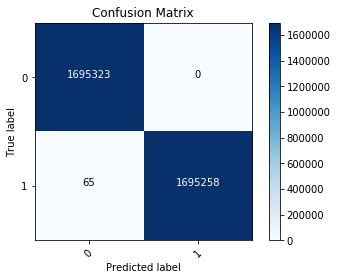

In [0]:
#Plot the Confusion Matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(cnf_matrix,  cmap=plt.cm.Blues) #Create the basic matrix

#Add title and axis labels
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

#Add appropriate axis scales
class_names = set(y) #Get class labels to add to matrix
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

#Add Labels to each cell
thresh = cnf_matrix.max() / 2. #Used for text coloring below
#Here we iterate through the confusion matrix and append labels to our visualization
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, cnf_matrix[i, j],
                 horizontalalignment="center",
                 color="white" if cnf_matrix[i, j] > thresh else "black")

#Add a side bar legend showing colors
plt.colorbar()

In [0]:
#conf_matrix function
def conf_matrix(y_true, y_pred):
    cm = {'TP': 0, 'TN': 0, 'FP': 0, 'FN': 0}
    
    for ind, label in enumerate(y_true):
        pred = y_pred[ind]
        if label == 1:
            # CASE: TP 
            if label == pred:
                cm['TP'] += 1
            # CASE: FN
            else:
                cm['FN'] += 1
        else:
            # CASE: TN
            if label == pred:
                cm['TN'] += 1
            # CASE: FP
            else:
                cm['FP'] += 1
    return cm

In [0]:
#Set variable
model_confusion_matrix = conf_matrix(y_train, y_hat_train)

In [0]:
#Precision function
def precision(confusion_matrix):
    return confusion_matrix['TP'] / (confusion_matrix['TP'] + confusion_matrix['FP'])

In [0]:
#Recall function
def recall(confusion_matrix):
    return confusion_matrix['TP'] / (confusion_matrix['TP'] + confusion_matrix['FN'])

In [0]:
#Accuracy function
def accuracy(confusion_matrix):
    return (confusion_matrix['TP'] + confusion_matrix['TN']) / sum(confusion_matrix.values())

In [0]:
#f1 score
def f1(confusion_matrix):
    precision_score = precision(confusion_matrix)
    recall_score = recall(confusion_matrix)
    numerator = precision_score * recall_score
    denominator = precision_score + recall_score
    return 2 * (numerator / denominator)

In [0]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

preds = [y_hat_train]

for ind, i in enumerate(preds):
    print('-'*40)
    print('Model Metrics:'.format(ind + 1))
    print('Precision: {}'.format(precision_score(y_train, i)))
    print('Recall: {}'.format(recall_score(y_train, i)))
    print('Accuracy: {}'.format(accuracy_score(y_train, i)))
    print('F1-Score: {}'.format(f1_score(y_train, i)))

----------------------------------------
Model Metrics:
Precision: 1.0
Recall: 0.9999616592236406
Accuracy: 0.9999808296118203
F1-Score: 0.9999808292443095


In [0]:
from sklearn.metrics import classification_report

for ind, i in enumerate(preds):
    print('-'*40)
    print("Model Classification Report:".format(ind + 1))
    print(classification_report(y_train, i))

----------------------------------------
Model Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1695323
           1       1.00      1.00      1.00   1695323

    accuracy                           1.00   3390646
   macro avg       1.00      1.00      1.00   3390646
weighted avg       1.00      1.00      1.00   3390646



## Cross Validation
Repeat a train-test-split creation 20 times, using a test_size of 0.05.

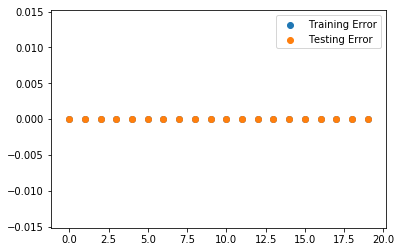

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
import matplotlib.pyplot as plt

num = 20
train_err = []
test_err = []
for i in range(num):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)
    logreg2.fit(X_train, y_train)
    y_hat_train = logreg2.predict(X_train)
    y_hat_test = logreg2.predict(X_test)
    train_err.append(mean_squared_error(y_train, y_hat_train))
    test_err.append(mean_squared_error(y_test, y_hat_test))
plt.scatter(list(range(num)), train_err, label='Training Error')
plt.scatter(list(range(num)), test_err, label='Testing Error')
plt.legend();

In [0]:
#K-Fold Cross Validation
from sklearn.model_selection import cross_val_score

cv_5_results = np.mean(cross_val_score(logreg2, X, y, cv=5, scoring="accuracy"))
cv_10_results = np.mean(cross_val_score(logreg2, X, y, cv=10, scoring="accuracy"))
cv_20_results = np.mean(cross_val_score(logreg2, X, y, cv=20, scoring="accuracy"))

print(cv_5_results)
print(cv_10_results)
print(cv_20_results)

0.9999955898420833
0.9999942668020019
0.9999942668253408


## Create a Sequential Neural Network
- ReLU activation function
- Sigmoid function on the output layer 

In [0]:
# Load libraries
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint

# split into input (X) and output (y) variables
X = pd.get_dummies(df_mvp[x_feats], drop_first=False)
y = df_mvp.sentiment

Using TensorFlow backend.


In [0]:
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=18, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [0]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
# Set callback functions to early stop training and save the best model so far
checkpoint = [ModelCheckpoint(filepath='models.hdf5', save_best_only=True, monitor='val_loss')]

In [0]:
# fit the keras model on the dataset
model.fit(X, y, epochs=10, callbacks=checkpoint, batch_size=100)

Epoch 1/10
2267492/2267492 [==============================] - 98s 43us/step - loss: 0.0149 - acc: 0.9983
Epoch 2/10
   3800/2267492 [..............................] - ETA: 2:32 - loss: 1.0751e-04 - acc: 1.0000

/opt/conda/lib/python3.6/site-packages/keras/callbacks.py:434: RuntimeWarning: Can save best model only with val_loss available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


2267492/2267492 [==============================] - 95s 42us/step - loss: 1.6438e-04 - acc: 1.0000
Epoch 3/10
2267492/2267492 [==============================] - 94s 41us/step - loss: 5.1810e-05 - acc: 1.0000
Epoch 4/10
2267492/2267492 [==============================] - 94s 41us/step - loss: 7.9910e-05 - acc: 1.0000
Epoch 5/10
2267492/2267492 [==============================] - 94s 42us/step - loss: 6.5819e-05 - acc: 1.0000
Epoch 6/10
2267492/2267492 [==============================] - 93s 41us/step - loss: 4.2580e-05 - acc: 1.0000
Epoch 7/10
2267492/2267492 [==============================] - 93s 41us/step - loss: 7.1064e-05 - acc: 1.0000
Epoch 8/10
2267492/2267492 [==============================] - 94s 41us/step - loss: 5.9863e-05 - acc: 1.0000
Epoch 9/10
2267492/2267492 [==============================] - 93s 41us/step - loss: 4.5589e-05 - acc: 1.0000
Epoch 10/10
2267492/2267492 [==============================] - 93s 41us/step - loss: 4.5079e-05 - acc: 1.0000


In [0]:
# evaluate the keras model
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

2267492/2267492 [==============================] - 87s 39us/step
Accuracy: 100.00


## Create a Sequential Neural Network with the scaled data
- ReLU activation function
- Sigmoid function on the output layer 

In [0]:
# split into input (X) and output (y) variables
X = pd.get_dummies(X_train, drop_first=False) #X_train = upsampled.drop('sentiment', axis=1)
y = y_train #y_train = upsampled.sentiment

In [0]:
# define the keras model
model2 = Sequential()
model2.add(Dense(12, input_dim=18, activation='relu'))
model2.add(Dense(8, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

In [0]:
# compile the keras model
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
# Set callback functions to early stop training and save the best model so far
checkpoint = [ModelCheckpoint(filepath='models.hdf5', save_best_only=True, monitor='val_loss')]

In [0]:
# fit the keras model on the dataset
model2.fit(X, y, epochs=10, callbacks=checkpoint, batch_size=100)

Epoch 1/10
2154117/2154117 [==============================] - 94s 43us/step - loss: 0.0019 - acc: 0.9996
Epoch 2/10
2154117/2154117 [==============================] - 92s 43us/step - loss: 0.0013 - acc: 0.9999
Epoch 3/10
2154117/2154117 [==============================] - 91s 42us/step - loss: 1.0600e-04 - acc: 1.0000
Epoch 4/10
2154117/2154117 [==============================] - 93s 43us/step - loss: 7.3868e-05 - acc: 1.0000
Epoch 5/10
2154117/2154117 [==============================] - 92s 43us/step - loss: 7.6414e-05 - acc: 1.0000
Epoch 6/10
2154117/2154117 [==============================] - 91s 42us/step - loss: 5.6550e-05 - acc: 1.0000
Epoch 7/10
2154117/2154117 [==============================] - 92s 43us/step - loss: 6.6125e-05 - acc: 1.0000
Epoch 8/10
2154117/2154117 [==============================] - 91s 42us/step - loss: 3.9061e-05 - acc: 1.0000
Epoch 9/10
2154117/2154117 [==============================] - 91s 42us/step - loss: 4.9487e-05 - acc: 1.0000
Epoch 10/10
2154117/2154117

In [0]:
# evaluate the keras model
_, accuracy = model2.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

2154117/2154117 [==============================] - 85s 40us/step
Accuracy: 100.00
